In [58]:
import pandas as pd

col_names = ["dbSize","collectionSize","tool", "collection", "operation", "operationDetails", "size", "waitTime", "timeToFirstByte", "downloadTime","totalTime"]
# load dataset
df = pd.read_csv("stats_2020-04-19T14-54-47.csv", header=None, names=col_names, delimiter=",")

# drop rows with missing values
df.dropna(inplace=True)

df.head(10)

,dbSize,collectionSize,tool,collection,operation,operationDetails,size,waitTime,timeToFirstByte,downloadTime,totalTime
0,SMALL,50,REST,users,GET,GET_ALL,12966.000000,0.033333,9.500000,0.133333,322
1,SMALL,50,REST,users,ADD,NONE,423.266667,0.133333,101.866667,0.300000,3094
2,SMALL,50,GraphQL,users,GET,GET_ALL,4775.000000,0.266667,14.333333,0.300000,477
3,SMALL,50,GraphQL,users,ADD,NONE,26.000000,0.066667,99.500000,0.266667,3022
4,SMALL,50,Falcor,users,GET,GET_ALL,72.000000,0.133333,1.500000,0.433333,94
5,SMALL,50,Falcor,users,ADD,NONE,27.000000,0.100000,97.766667,0.233333,2967
6,SMALL,5,REST,diets,GET,GET_ALL,771.000000,0.033333,3.633333,0.333333,152
7,SMALL,5,REST,diets,ADD,NONE,169.766667,0.033333,4.400000,0.333333,180
8,SMALL,5,REST,diets,UPDATE,NONE,169.766667,0.066667,6.466667,0.200000,256
9,SMALL,5,GraphQL,diets,GET,GET_ALL,4238.433333,0.133333,10.766667,0.400000,380


x [  50  200 1000]
y [3094.0, 3022.0, 2967.0]
x [  50  200 1000]
y [4654.0, 4608.0, 4596.0]
x [  50  200 1000]
y [4716.0, 4765.0, 4777.0]


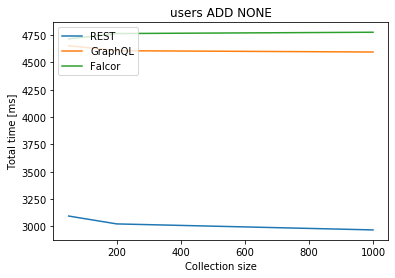

x [  50  200 1000]
y [322.0, 477.0, 94.0]
x [  50  200 1000]
y [1022.0, 1245.0, 99.0]
x [  50  200 1000]
y [4802.0, 4237.0, 95.0]


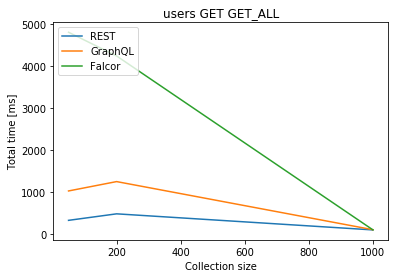

x [ 5 10 20]
y [180.0, 201.0, 186.0]
x [ 5 10 20]
y [174.0, 200.0, 182.0]
x [ 5 10 20]
y [185.0, 204.0, 188.0]


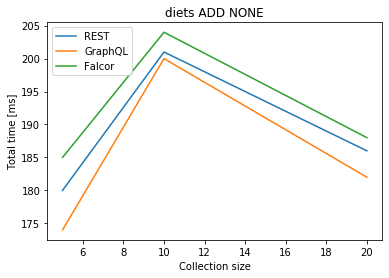

x [ 5 10 20]
y [152.0, 380.0, 3058.0]
x [ 5 10 20]
y [166.0, 363.0, 3492.0]
x [ 5 10 20]
y [210.0, 387.0, 3809.0]


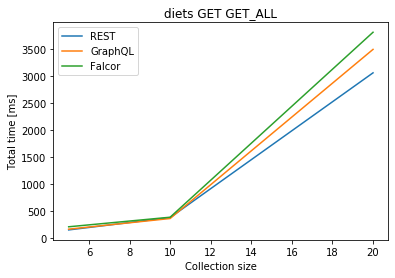

x [ 5 10 20]
y [256.0, 332.0, 203.0]
x [ 5 10 20]
y [275.0, 313.0, 261.0]
x [ 5 10 20]
y [286.0, 324.0, 262.0]


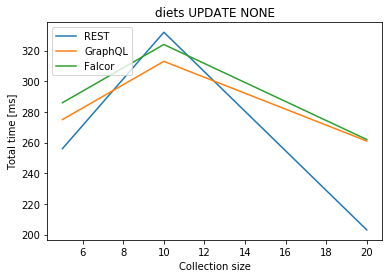

x [ 500 1000 2000]
y [344.0, 495.0, 481.0]
x [ 500 1000 2000]
y [474.0, 493.0, 533.0]
x [ 500 1000 2000]
y [562.0, 486.0, 519.0]


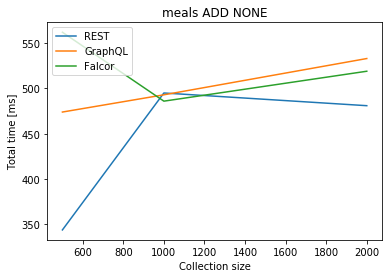

x [ 500 1000 2000]
y [203.0, 226.0, 260.0]
x [ 500 1000 2000]
y [224.0, 196.0, 238.0]
x [ 500 1000 2000]
y [223.0, 192.0, 244.0]


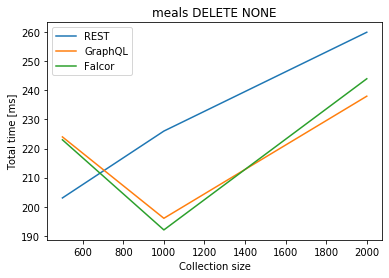

x [ 500 1000 2000]
y [15696.0, 15487.0, 16895.0]
x [ 500 1000 2000]
y [31611.0, 31151.0, 41869.0]
x [ 500 1000 2000]
y [66446.0, 66475.0, 108896.0]


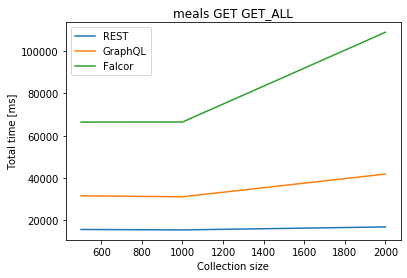

x [ 500 1000 2000]
y [210.0, 239.0, 109.0]
x [ 500 1000 2000]
y [228.0, 212.0, 100.0]
x [ 500 1000 2000]
y [320.0, 216.0, 120.0]


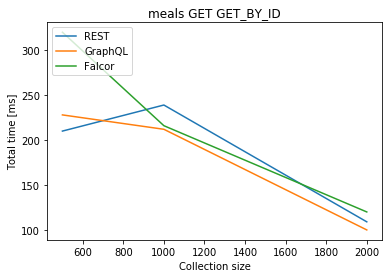

x [ 500 1000 2000]
y [432.0, 596.0, 522.0]
x [ 500 1000 2000]
y [535.0, 537.0, 515.0]
x [ 500 1000 2000]
y [695.0, 499.0, 561.0]


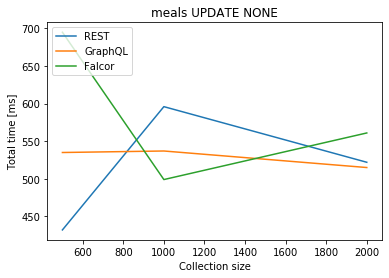

In [59]:
import matplotlib.pyplot as plt
import numpy as np

db_sizes = pd.unique(df['dbSize'])
tools = pd.unique(df['tool'])
collections = pd.unique(df['collection'])
uniformed_collections = list(filter(lambda collection: collection != "products", collections))

for collection in uniformed_collections:
    x = np.unique(df[df['collection'] == collection]['collectionSize'])
    operations = np.unique(df[df['collection'] == collection]['operation'])
                           
    for operation in operations:
        operationDetails = np.unique(df[(df['collection'] == collection)
                                     & (df['operation'] == operation)]['operationDetails'])
        for operationDetail in operationDetails:          
            for db_size in db_sizes:
                y = []
                for tool in tools:
                    value = df[(df['tool'] == tool)
                                & (df['collection'] == collection)
                                & (df['dbSize'] == db_size)
                                & (df['operation'] == operation)
                                & (df['operationDetails'] == operationDetail)]['totalTime']
                    y.append(float(value))
                print('x', x)
                print('y', y)
                plt.plot(x, y)
            plt.xlabel('Collection size')
            plt.ylabel('Total time [ms]')
            plt.title(collection + " " + operation + " " + operationDetail)
            plt.legend(tools, loc='upper left')
            plt.show()